In [1]:
#!pip install ipynb

In [2]:
#pip install numexpr==2.7.3

In [3]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [4]:
import os
import numpy as np
import random
os.environ['PYTHONHASHSEED']=str(42)

In [5]:
from skimage import io
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

In [7]:
from ipynb.fs.full.DataLoader import DataLoader

In [8]:
images, masks = DataLoader()

Loading Images


100%|██████████| 3350/3350 [00:04<00:00, 709.91it/s]


Loading Masks


100%|██████████| 3350/3350 [00:02<00:00, 1123.34it/s]


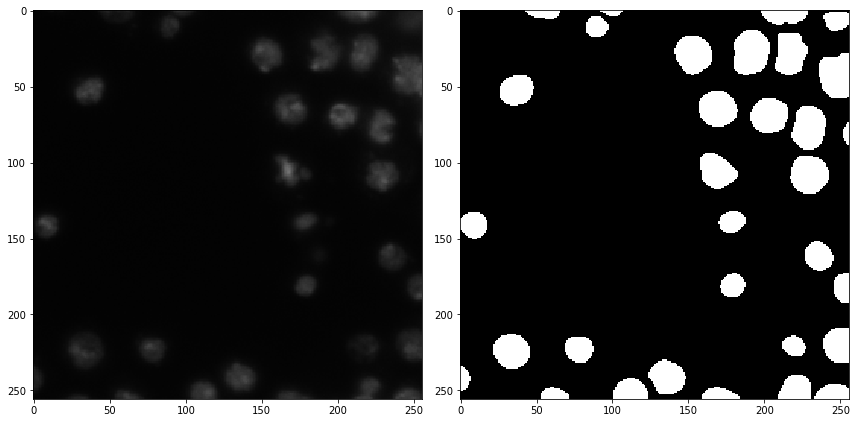

In [9]:
#Sanity check
image_number = random.randint(0, len(images))
plt.figure(figsize=(12, 6))
plt.subplot(121)
imshow(images[image_number])
plt.subplot(122)
imshow(np.squeeze(masks[image_number]).astype(float))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size = 0.10, random_state = 0)

In [11]:
from ipynb.fs.full.unet import unet

In [12]:
def get_model():
    return unet(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [13]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    verbose=1, 
                    epochs=150, 
                    validation_split=0.15, 
                    shuffle=True, callbacks=callbacks)

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the

In [14]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

11/11 [==============================] - 0s 31ms/step - loss: -0.9274 - iou: 0.8639
Accuracy =  86.39373779296875 %


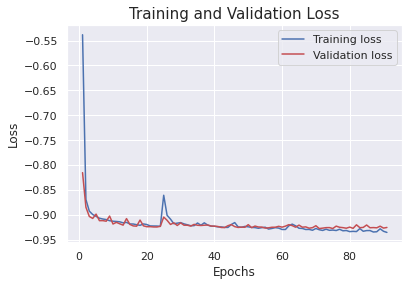

In [15]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
sns.set(style="darkgrid")
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plt.savefig('unetloss.png')

In [16]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file="my_model.png", show_shapes=True)

## Model 2

In [17]:
from ipynb.fs.full.custom_unetv20 import custom_unetv20

In [18]:
def get_model2():
    return custom_unetv20(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model2 = get_model2()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 256, 256, 5)  140         ['input_2[0][0]']                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 256, 256, 5)  140         ['input_2[0][0]']                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 256, 256, 5)  140         ['input_2[0][0]']          

In [19]:
checkpointer2 = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks2 = [
        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

history2 = model2.fit(X_train, y_train, 
                    batch_size = 32, 
                    verbose=1, 
                    epochs=150, 
                    validation_split=0.15, 
                    shuffle=True, callbacks=callbacks2)

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the

In [20]:
_, acc = model2.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

11/11 [==============================] - 1s 131ms/step - loss: -0.9360 - iou: 0.8792
Accuracy =  87.92473077774048 %


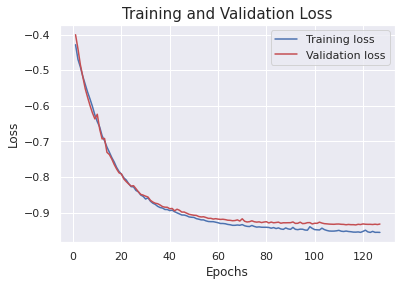

In [21]:
#plot the training and validation accuracy and loss at each epoch
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
sns.set(style="darkgrid")
plt.plot(epochs2, loss2, 'b', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plt.savefig('proposedloss.png')

## Comparison of segmentation results

In [22]:
idx = random.randint(0, len(images))

preds_train = model.predict(X_train, verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train2 = model2.predict(X_train, verbose=1)
preds_test2 = model2.predict(X_test, verbose=1)

11/11 [==============================] - 1s 116ms/step


In [23]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

preds_train_t2 = (preds_train2 > 0.5).astype(np.uint8)
preds_test_t2 = (preds_test2 > 0.5).astype(np.uint8)

Vanilla Unet IoU score:  0.8863334807607254
Proposed model IoU score:  0.8985572587917042


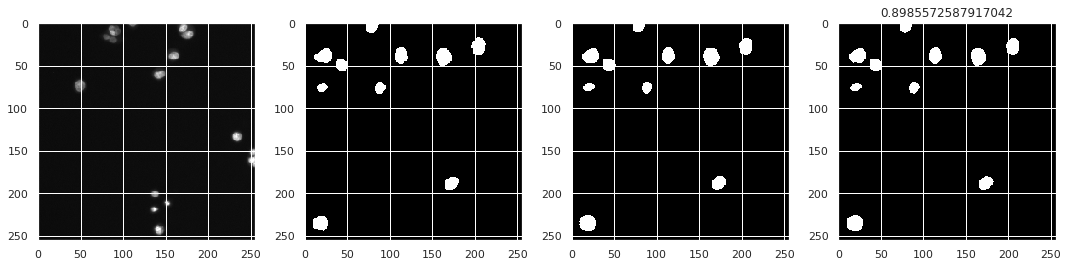

In [24]:
# Sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))

intersection = np.logical_and(y_train[ix], preds_train_t[ix])
union = np.logical_or(y_train[ix], preds_train_t[ix])
iou_score = np.sum(intersection) / np.sum(union)
print("Vanilla Unet IoU score: ", iou_score)

intersection2 = np.logical_and(y_train[ix], preds_train_t2[ix])
union2 = np.logical_or(y_train[ix], preds_train_t2[ix])
iou_score2 = np.sum(intersection2) / np.sum(union2)
print("Proposed model IoU score: ", iou_score2)


f, axarr = plt.subplots(nrows=1,ncols=4, figsize=(15,4))
plt.sca(axarr[0]); 
imshow(images[ix])
plt.sca(axarr[1]);
imshow(np.squeeze(y_train[ix]).astype(float))
plt.sca(axarr[2]); 
imshow(np.squeeze(preds_train_t[ix]).astype(float))
plt.sca(axarr[3]); 
imshow(np.squeeze(preds_train_t2[ix]).astype(float))
plt.title(iou_score2)
plt.show()

Vanilla Unet IoU score:  0.9624965967873673
Proposed model IoU score:  0.9585915684805557


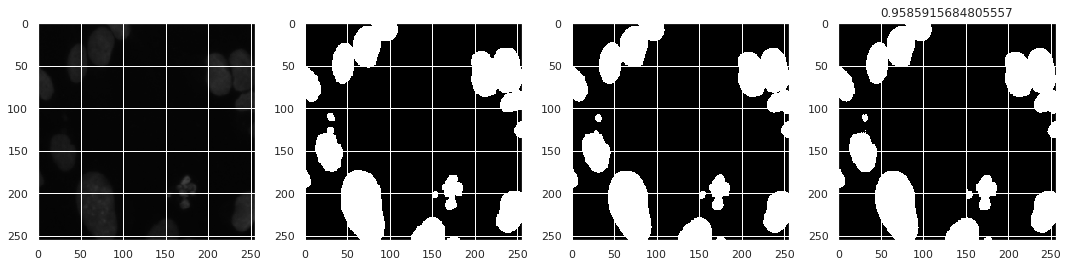

In [25]:
# sanity check on some random test samples
ix = random.randint(0, len(preds_test_t))

intersection = np.logical_and(y_test[ix], preds_test_t[ix])
union = np.logical_or(y_test[ix], preds_test_t[ix])
iou_score = np.sum(intersection) / np.sum(union)
print("Vanilla Unet IoU score: ", iou_score)

intersection2 = np.logical_and(y_test[ix], preds_test_t2[ix])
union2 = np.logical_or(y_test[ix], preds_test_t2[ix])
iou_score2 = np.sum(intersection2) / np.sum(union2)
print("Proposed model IoU score: ", iou_score2)


f, axarr = plt.subplots(nrows=1,ncols=4, figsize=(15,4))
plt.sca(axarr[0]); 
imshow(X_test[ix])
plt.sca(axarr[1]);
imshow(np.squeeze(y_test[ix]).astype(float))
plt.sca(axarr[2]); 
imshow(np.squeeze(preds_test_t[ix]).astype(float))
plt.sca(axarr[3]); 
imshow(np.squeeze(preds_test_t2[ix]).astype(float))
plt.title(iou_score2)
plt.show()

### Report Examples

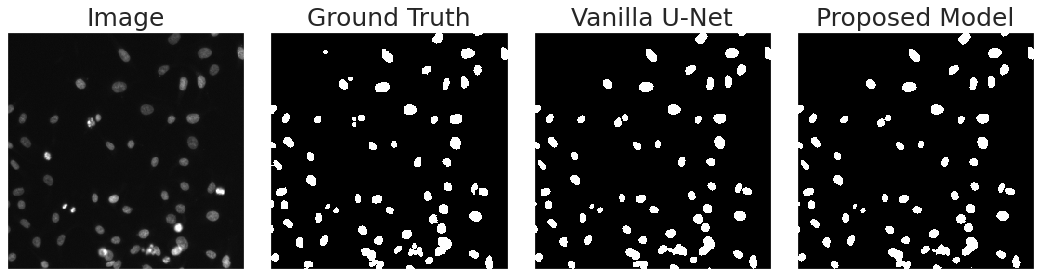

In [26]:
ix = 125

intersection = np.logical_and(y_test[ix], preds_test_t[ix])
union = np.logical_or(y_test[ix], preds_test_t[ix])
iou_score = np.sum(intersection) / np.sum(union)

intersection2 = np.logical_and(y_test[ix], preds_test_t2[ix])
union2 = np.logical_or(y_test[ix], preds_test_t2[ix])
iou_score2 = np.sum(intersection2) / np.sum(union2)

f, axarr = plt.subplots(nrows=1,ncols=4, figsize=(15,4))

plt.sca(axarr[0]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(X_test[ix])
plt.title('Image', fontsize = 25)

plt.sca(axarr[1]);
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(y_test[ix]).astype(float))
plt.title('Ground Truth', fontsize = 25)

plt.sca(axarr[2]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t[ix]).astype(float))
plt.title('Vanilla U-Net', fontsize = 25)

plt.sca(axarr[3]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t2[ix]).astype(float))
plt.title('Proposed Model', fontsize = 25)
plt.show()
#plt.savefig('example125.png')

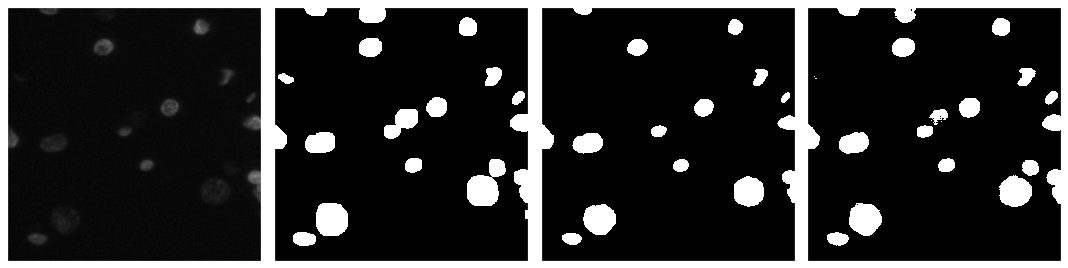

In [27]:
ix = 39

intersection = np.logical_and(y_test[ix], preds_test_t[ix])
union = np.logical_or(y_test[ix], preds_test_t[ix])
iou_score = np.sum(intersection) / np.sum(union)

intersection2 = np.logical_and(y_test[ix], preds_test_t2[ix])
union2 = np.logical_or(y_test[ix], preds_test_t2[ix])
iou_score2 = np.sum(intersection2) / np.sum(union2)

f, axarr = plt.subplots(nrows=1,ncols=4, figsize=(15,4))

plt.sca(axarr[0]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(X_test[ix])
#plt.title('Image')

plt.sca(axarr[1]);
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(y_test[ix]).astype(float))
#plt.title('Ground Truth')

plt.sca(axarr[2]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t[ix]).astype(float))
#plt.title('Vanilla U-Net')

plt.sca(axarr[3]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t2[ix]).astype(float))
#plt.title('Proposed Model')
plt.show()
#plt.savefig('example39.png')

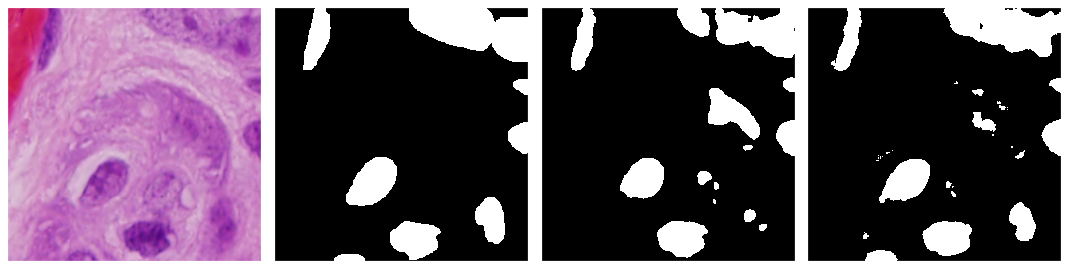

In [28]:
ix = 325

intersection = np.logical_and(y_test[ix], preds_test_t[ix])
union = np.logical_or(y_test[ix], preds_test_t[ix])
iou_score = np.sum(intersection) / np.sum(union)

intersection2 = np.logical_and(y_test[ix], preds_test_t2[ix])
union2 = np.logical_or(y_test[ix], preds_test_t2[ix])
iou_score2 = np.sum(intersection2) / np.sum(union2)

f, axarr = plt.subplots(nrows=1,ncols=4, figsize=(15,4))

plt.sca(axarr[0]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(X_test[ix])
#plt.title('Image')

plt.sca(axarr[1]);
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(y_test[ix]).astype(float))
#plt.title('Ground Truth')

plt.sca(axarr[2]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t[ix]).astype(float))
#plt.title('Vanilla U-Net')

plt.sca(axarr[3]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t2[ix]).astype(float))
#plt.title('Proposed Model')
plt.show()

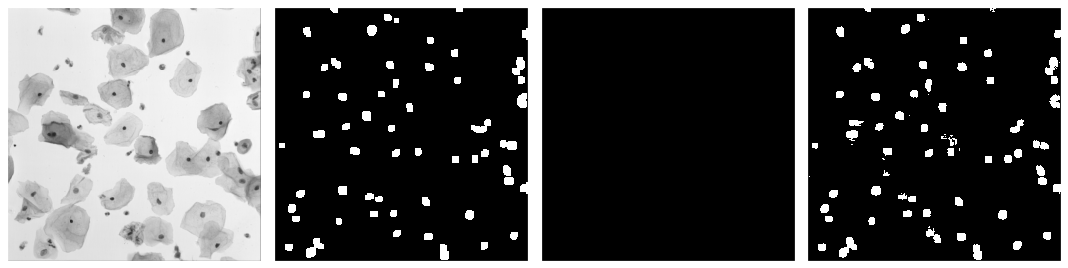

In [29]:
ix = 117

intersection = np.logical_and(y_test[ix], preds_test_t[ix])
union = np.logical_or(y_test[ix], preds_test_t[ix])
iou_score = np.sum(intersection) / np.sum(union)

intersection2 = np.logical_and(y_test[ix], preds_test_t2[ix])
union2 = np.logical_or(y_test[ix], preds_test_t2[ix])
iou_score2 = np.sum(intersection2) / np.sum(union2)

f, axarr = plt.subplots(nrows=1,ncols=4, figsize=(15,4))

plt.sca(axarr[0]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(X_test[ix])
#plt.title('Image')

plt.sca(axarr[1]);
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(y_test[ix]).astype(float))
#plt.title('Ground Truth')

plt.sca(axarr[2]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t[ix]).astype(float))
#plt.title('Vanilla U-Net')

plt.sca(axarr[3]); 
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
imshow(np.squeeze(preds_test_t2[ix]).astype(float))
#plt.title('Proposed Model')
plt.show()

## Ablation Studies

#### U-Net with Channel Attention

In [30]:
from ipynb.fs.full.ablationv1 import ablationv1

In [31]:
def get_model3():
    return ablationv1(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model3 = get_model3()

In [32]:
callbacks3 = [
        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

history3 = model3.fit(X_train, y_train, 
                    batch_size = 32, 
                    verbose=1, 
                    epochs=150, 
                    validation_split=0.15, 
                    shuffle=True, callbacks=callbacks3)

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the

In [33]:
_, acc = model3.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

11/11 [==============================] - 0s 29ms/step - loss: -0.9306 - iou: 0.8688
Accuracy =  86.88425421714783 %


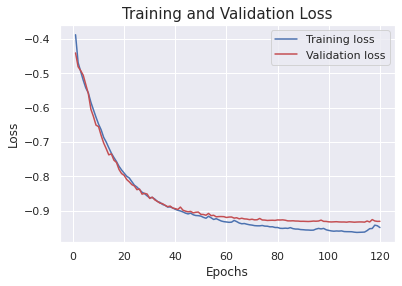

In [34]:
#plot the training and validation accuracy and loss at each epoch
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
sns.set(style="darkgrid")
plt.plot(epochs3, loss3, 'b', label='Training loss')
plt.plot(epochs3, val_loss3, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plt.savefig('proposedloss.png')

#### U-Net with Channel Attention and MDR Blocks

In [35]:
from ipynb.fs.full.ablationv2 import ablationv2

In [36]:
def get_model4():
    return ablationv2(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model4 = get_model4()

In [37]:
callbacks4 = [
        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

history4 = model4.fit(X_train, y_train, 
                    batch_size = 32, 
                    verbose=1, 
                    epochs=150, 
                    validation_split=0.15, 
                    shuffle=True, callbacks=callbacks4)

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the

In [38]:
_, acc = model4.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

11/11 [==============================] - 1s 91ms/step - loss: -0.9327 - iou: 0.8734
Accuracy =  87.34352588653564 %


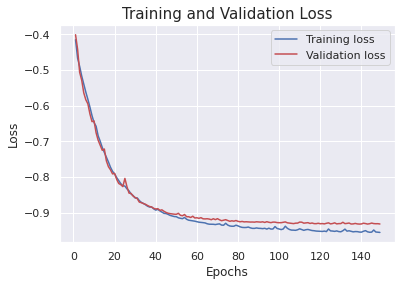

In [39]:
#plot the training and validation accuracy and loss at each epoch
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1, len(loss4) + 1)
sns.set(style="darkgrid")
plt.plot(epochs4, loss4, 'b', label='Training loss')
plt.plot(epochs4, val_loss4, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plt.savefig('proposedloss.png')

#### U-Net with Channel Attention and Res Path

In [40]:
from ipynb.fs.full.ablationv3 import ablationv3

In [41]:
def get_model5():
    return ablationv3(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model5 = get_model5()

In [42]:
callbacks5 = [
        tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

history5 = model5.fit(X_train, y_train, 
                    batch_size = 32, 
                    verbose=1, 
                    epochs=150, 
                    validation_split=0.15, 
                    shuffle=True, callbacks=callbacks5)

Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the

In [43]:
_, acc = model5.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

11/11 [==============================] - 1s 63ms/step - loss: -0.9358 - iou: 0.8782
Accuracy =  87.81839609146118 %


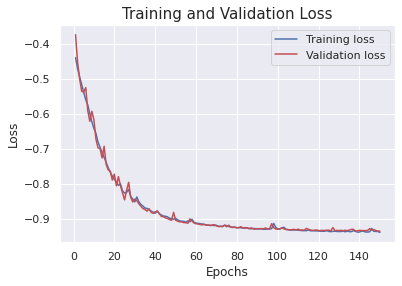

In [44]:
#plot the training and validation accuracy and loss at each epoch
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1, len(loss5) + 1)
sns.set(style="darkgrid")
plt.plot(epochs5, loss5, 'b', label='Training loss')
plt.plot(epochs5, val_loss5, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plt.savefig('proposedloss.png')